# Summer of Code - Artificial Intelligence

## Week 06: Linear Regression

### Day 02: Polynomial Regression

In this notebook, we will explore **Polynomial Regression** using Python's Scikit-Learn library.


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    root_mean_squared_error,
)
from sklearn.pipeline import Pipeline
import sklearn
import warnings

warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

Libraries imported successfully!
NumPy version: 2.2.6
Pandas version: 2.2.3
Scikit-learn version: 1.6.0


In [34]:
# Load and prepare the California Housing Dataset
df = pd.read_csv('../../datasets/california_house_prices/housing_cleaned.csv')

print("California Housing Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")


California Housing Dataset loaded successfully!
Dataset shape: (20640, 16)


In [35]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_INLAND',
 'ocean_ISLAND',
 'ocean_NEAR BAY',
 'ocean_NEAR OCEAN']

In [36]:
# Select features for modeling
feature_columns = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household",
    "ocean_INLAND",
    "ocean_ISLAND",
    "ocean_NEAR BAY",
    "ocean_NEAR OCEAN",
]
X = df[feature_columns].values
y = df["median_house_value"].values.reshape(-1, 1)

print(f"Features selected: {len(feature_columns)}")
print(f"Target variable: median_house_value")
print(f"Data shape: X={X.shape}, y={y.shape}")

Features selected: 13
Target variable: median_house_value
Data shape: X=(20640, 13), y=(20640, 1)


# Multivariate Linear Regression with Scikit-Learn

A multivariate linear regression model using scikit-learn's LinearRegression class.


In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")


Training set: 16512 samples
Testing set: 4128 samples


In [44]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train mean after scaling: {X_train_scaled.mean():.2f}")
print(f"X_test mean after scaling: {X_test_scaled.mean():.2f}")


X_train mean after scaling: 0.00
X_test mean after scaling: 0.00


In [45]:
# Create and train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")
print(f"Model parameters:")
print(f"  Intercept: ${lr_model.intercept_.item():.2f}")
print(f"  Number of coefficients: {len(lr_model.coef_[0])}")


Linear Regression model trained successfully!
Model parameters:
  Intercept: $205894.94
  Number of coefficients: 13


In [46]:
# Make predictions on training data
y_train_pred = lr_model.predict(X_train_scaled)

# Prediction error on training set
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training set performance:")
print(f"Root Mean Squared Error: ${train_rmse:,.2f}")
print(f"R² Score: {train_r2:.4f}")


Training set performance:
Root Mean Squared Error: $69,399.74
R² Score: 0.6372


In [47]:
# Make predictions on testing data
y_test_pred = lr_model.predict(X_test_scaled)

# Prediction error on testing set
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Testing set performance:")
print(f"Root Mean Squared Error: ${test_rmse:,.2f}")
print(f"R² Score: {test_r2:.4f}")

Testing set performance:
Root Mean Squared Error: $70,040.15
R² Score: 0.6353


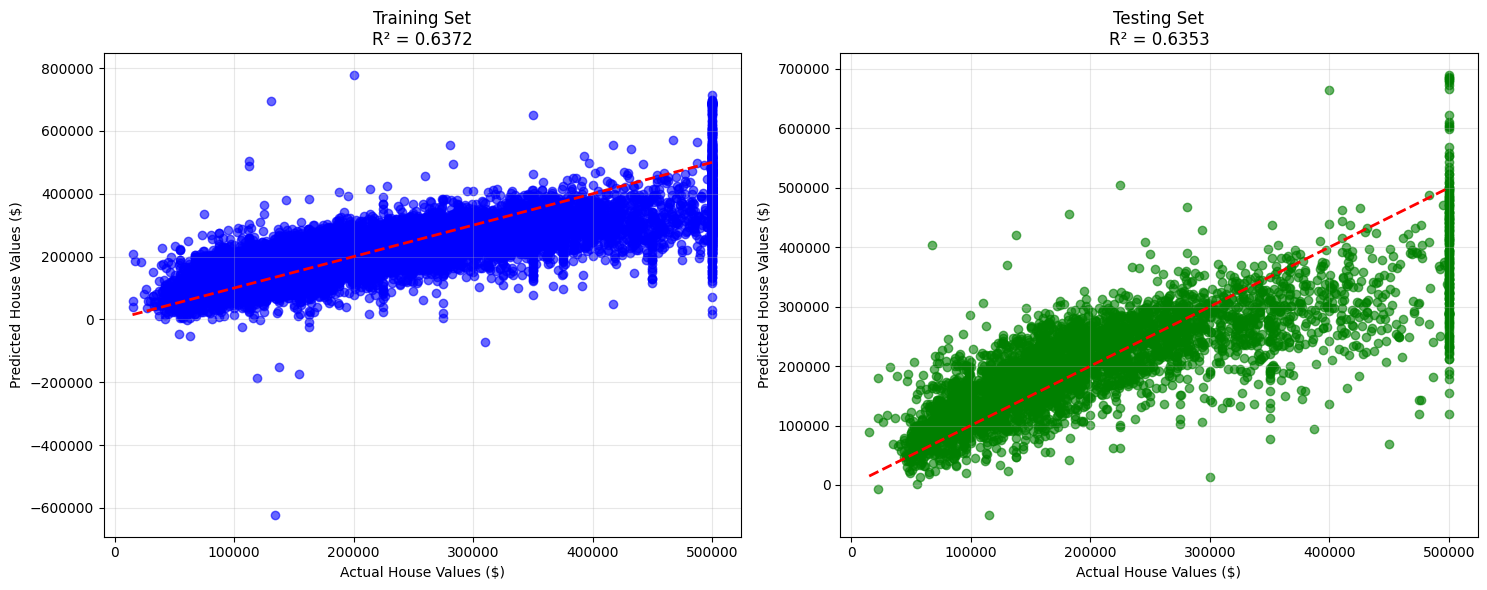

Model evaluation completed!


In [48]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual House Values ($)')
axes[0].set_ylabel('Predicted House Values ($)')
axes[0].set_title(f'Training Set\nR² = {train_r2:.4f}')
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual House Values ($)')
axes[1].set_ylabel('Predicted House Values ($)')
axes[1].set_title(f'Testing Set\nR² = {test_r2:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Model evaluation completed!")


# Polynomial Regression

## What is Polynomial Regression?

**Polynomial Regression** is a form of linear regression where we add polynomial terms to capture non-linear relationships between features and target.

### Linear Regression:
$$
\hat{y} = h(X) = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + ... + w_mx_n
$$

### Polynomial Regression (degree 2):
$$
\hat{y} = h(X) = w_0 + w_1x_1 + w_2x_1^2 + w_3x_2 + w_4x_2^2 + w_5x_1x_2 + ... + w_mx_n^d
$$


In [74]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")

Original features: 13
Polynomial features: 2379


In [75]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

print(f"Polynomial model intercept: ${poly_model.intercept_.item():.2f}")
print(f"Number of polynomial coefficients: {len(poly_model.coef_[0])}")


Polynomial model intercept: $207936.30
Number of polynomial coefficients: 2379


In [76]:
# Making predictions on training data
y_train_poly_pred = poly_model.predict(X_train_poly)
y_train_poly_rmse = root_mean_squared_error(y_train, y_train_poly_pred)
y_train_poly_r2 = r2_score(y_train, y_train_poly_pred)

print(f"Training set performance with Polynomial Regression:")
print(f"Root Mean Squared Error: ${y_train_poly_rmse:,.2f}")
print(f"R² Score: {y_train_poly_r2:.4f}")

Training set performance with Polynomial Regression:
Root Mean Squared Error: $53,636.98
R² Score: 0.7833


In [77]:
# Making predictions on test data
y_test_poly_pred = poly_model.predict(
    X_test_poly[np.arange(len(X_test_poly)) != 1232]
)
y_test_poly_rmse = root_mean_squared_error(
    y_test[np.arange(len(y_test)) != 1232], y_test_poly_pred
)
y_test_poly_r2 = r2_score(y_test[np.arange(len(y_test)) != 1232], y_test_poly_pred)
print(f"Test set performance with Polynomial Regression:")
print(f"Root Mean Squared Error: ${y_test_poly_rmse:,.2f}")
print(f"R² Score: {y_test_poly_r2:.4f}")

Test set performance with Polynomial Regression:
Root Mean Squared Error: $851,814.48
R² Score: -52.9385


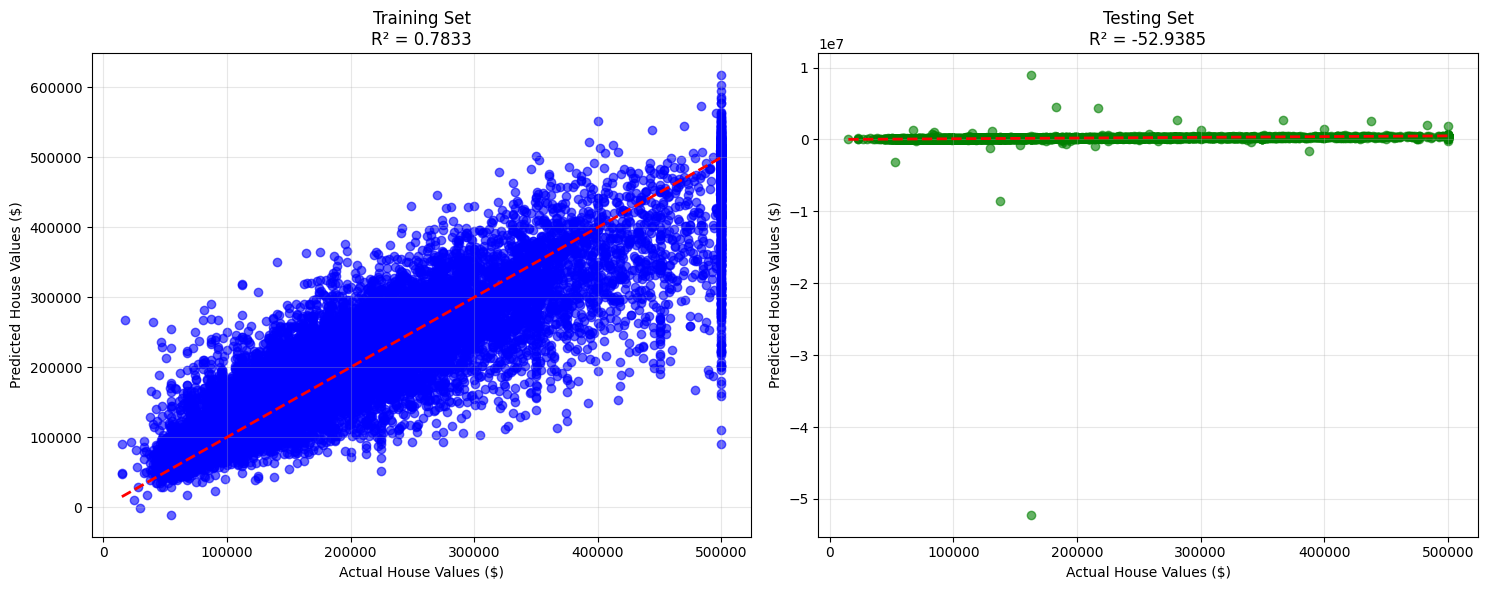

Polynomial Model evaluation completed!


In [78]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set
axes[0].scatter(y_train, y_train_poly_pred, alpha=0.6, color="blue")
axes[0].plot(
    [y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", lw=2
)
axes[0].set_xlabel("Actual House Values ($)")
axes[0].set_ylabel("Predicted House Values ($)")
axes[0].set_title(f"Training Set\nR² = {y_train_poly_r2:.4f}")
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(
    y_test[np.arange(len(y_test)) != 1232],
    y_test_poly_pred,
    alpha=0.6,
    color="green",
)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
axes[1].set_xlabel("Actual House Values ($)")
axes[1].set_ylabel("Predicted House Values ($)")
axes[1].set_title(f"Testing Set\nR² = {y_test_poly_r2:.4f}")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Polynomial Model evaluation completed!")

# Cross-Validation Techniques
**Cross-Validation** is a technique to evaluate model performance more robustly than simple train-test split:

## Benefits:
- **More Reliable Estimates**: Multiple evaluations reduce variance
- **Better Model Selection**: Choose best hyperparameters
- **Detect Overfitting**: See how model generalizes
- **Use All Data**: More efficient use of available data

## Types of Cross-Validation

### Simple Cross-Validation:
- Split data into train and validation sets
- Train on train set, evaluate on validation set
- **Limitation**: Single evaluation, can be noisy


In [92]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=7
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=7
)
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Testing set: {len(X_test)} samples")


Training set: 12384 samples
Validation set: 4128 samples
Testing set: 4128 samples


In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred = lr_model.predict(X_val_scaled)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation set performance:")
print(f"Root Mean Squared Error: ${val_rmse:,.2f}")
print(f"R² Score: {val_r2:.4f}")


Validation set performance:
Root Mean Squared Error: $71,010.22
R² Score: 0.6249


### K-Fold Cross-Validation:
- Split data into k folds
- Train on k-1 folds, test on remaining fold
- Repeat k times, average results

In [96]:
# KFold Cross-Validation
k = 5
cv_scores = cross_val_score(
    lr_model, X_train_scaled, y_train, cv=k, scoring="neg_mean_squared_error"
)
print(f"{k}-Fold Cross-Validation results:")
print(f"Mean RMSE: ${np.sqrt(-cv_scores).mean():,.2f}")
print(f"RMSE Std Dev: ${np.sqrt(-cv_scores).std():,.2f}")


5-Fold Cross-Validation results:
Mean RMSE: $69,858.98
RMSE Std Dev: $2,024.72


In [97]:
cv_scores

array([-4.44996941e+09, -5.15277811e+09, -4.83148947e+09, -4.75947309e+09,
       -5.22817360e+09])

In [ ]:
# Implement Cross-Validation
print("=== CROSS-VALIDATION IMPLEMENTATION ===")

# Test different models with cross-validation
models_to_test = {
    "Linear Regression": LinearRegression(),
    "Polynomial (Degree 2)": Pipeline(
        [("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression())]
    ),
    # 'Polynomial (Degree 3)': Pipeline([
    #     ('poly', PolynomialFeatures(degree=3)),
    #     ('linear', LinearRegression())
    # ])
}

# Test different k values for cross-validation
k_values = [3, 5, 10]
cv_results = {}

for model_name, model in models_to_test.items():
    print(f"\nTesting {model_name}:")
    cv_results[model_name] = {}

    for k in k_values:
        # Perform k-fold cross-validation
        cv_scores = cross_val_score(
            model, X_train_scaled, y_train, cv=k, scoring="r2", n_jobs=-1
        )

        mean_score = cv_scores.mean()
        std_score = cv_scores.std()

        print(f"  {k}-Fold CV: R² = {mean_score:.4f} (±{std_score:.4f})")

        cv_results[model_name][f"{k}_fold"] = {
            "mean": mean_score,
            "std": std_score,
            "scores": cv_scores,
        }

print("\nCross-validation testing completed!")

# Overfitting and Underfitting

## Overfitting:
- **Definition**: Model performs well on training data but poorly on new data
- **Symptoms**: High training accuracy, low testing accuracy
- **Causes**: Too complex model, insufficient data, noise in data
- **Solution**: Regularization, more data, simpler model

## Underfitting:
- **Definition**: Model is too simple to capture underlying patterns
- **Symptoms**: Low training and testing accuracy
- **Causes**: Too simple model, insufficient features
- **Solution**: More complex model, feature engineering



## Learning Curves

**Learning Curves** show how model performance changes as we increase training data size. They help us identify:
- **Bias**: How much the model is underfitting
- **Variance**: How much the model is overfitting
- **Optimal Training Size**: When to stop collecting more data


=== LEARNING CURVES ANALYSIS ===

Analyzing Linear Regression:


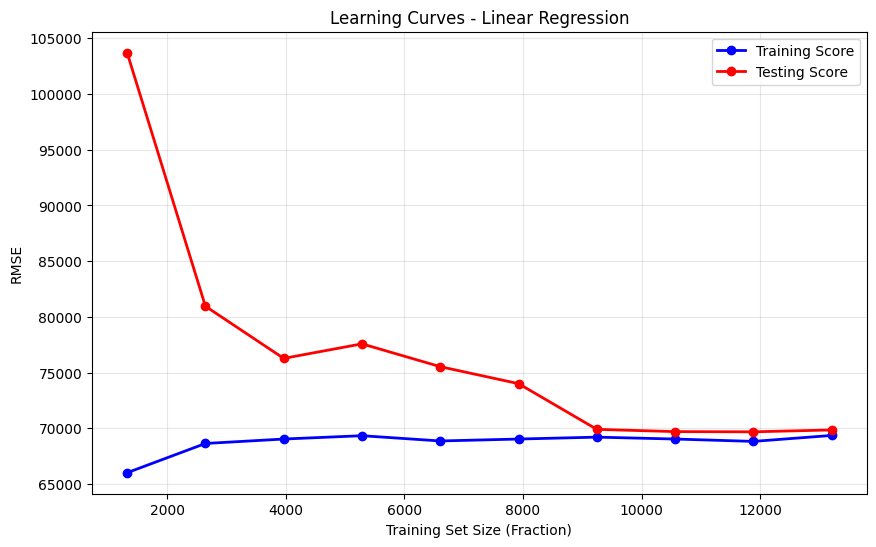


Analyzing Polynomial (Degree 2):


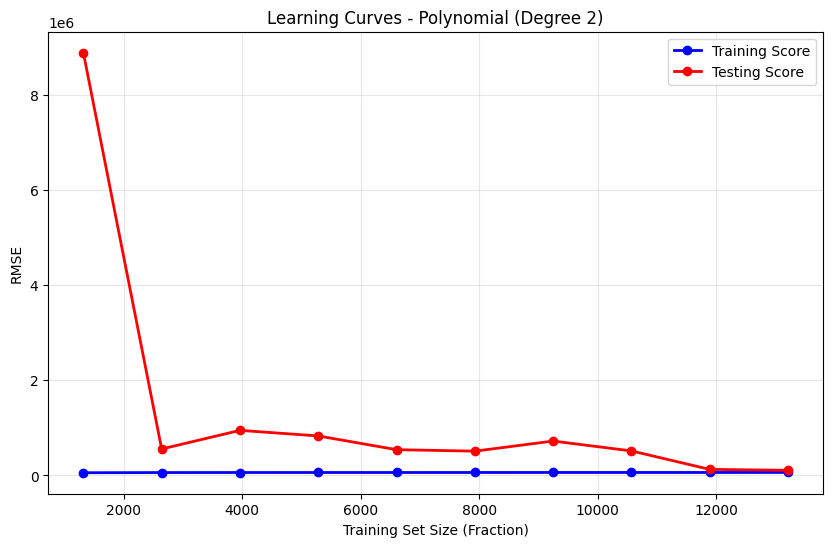


Analyzing Polynomial (Degree 3):


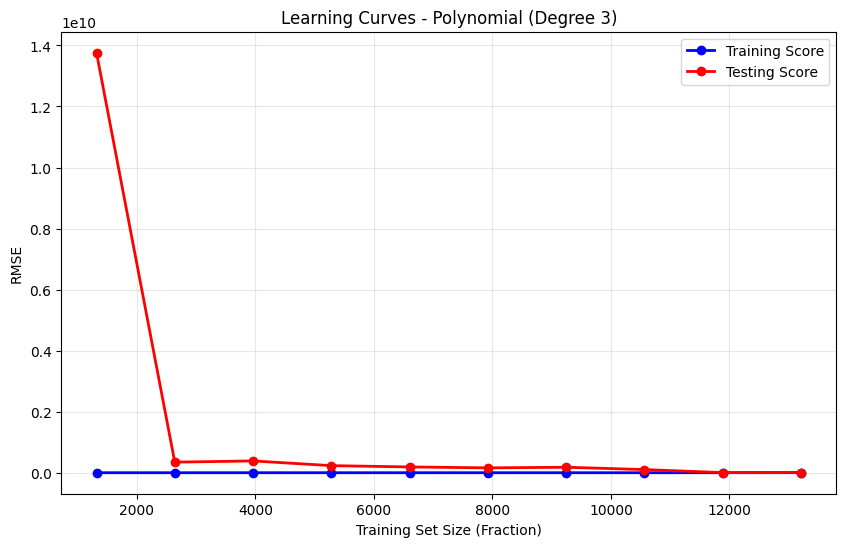

In [86]:
from sklearn.model_selection import learning_curve


# Implement Learning Curves
def plot_learning_curves(model, X_train, y_train, model_name):
    """Plot learning curves for a given model using sklearn's learning_curve"""
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train.ravel(),
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring="neg_root_mean_squared_error",
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(
        train_sizes,
        train_scores_mean,
        "b-o",
        label="Training Score",
        linewidth=2,
    )
    plt.plot(
        train_sizes,
        test_scores_mean,
        "r-o",
        label="Testing Score",
        linewidth=2,
    )
    plt.xlabel("Training Set Size (Fraction)")
    plt.ylabel("RMSE")
    plt.title(f"Learning Curves - {model_name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return train_scores_mean, test_scores_mean

print("=== LEARNING CURVES ANALYSIS ===")

# Test different models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial (Degree 2)": Pipeline(
        [("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression())]
    ),
    "Polynomial (Degree 3)": Pipeline(
        [("poly", PolynomialFeatures(degree=3)), ("linear", LinearRegression())]
    ),
}

# Plot learning curves for each model
for name, model in models.items():
    print(f"\nAnalyzing {name}:")
    train_scores, test_scores = plot_learning_curves(
        model, X_train_scaled, y_train, name
    )